## Soleil DiffAbs XRD:
* [Calibration](#calibration)
* [Integration](#integration)

## Calibration <a name="calibration"></a>

This tutorial is for the calibration of an Xpad_flat on the Soleil Diffabs Diffractometer.

The calibration data is a scan on the delta motor with a CeO2 calibrant.

In [1]:
%matplotlib notebook

# first the imports
from typing import Iterator, List, NamedTuple, Text, Tuple

import os
import functools

from collections import namedtuple
from math import pi

import numpy
import pylab
import pyFAI

import ipywidgets as widgets

from h5py import Dataset, File
from IPython.display import display
from numpy import ndarray
from pyFAI.gui import jupyter

# local import
from soleil import Angle, Calibrant, Calibration, CalibrationFunctions, CalibrationFrame, DatasetPathContains, DatasetPathWithAttribute, \
    Detector, Length, Parameter, Wavelength, \
    calibration, integrate, save_as_edf

In [2]:
# define a bunch of constants
CEO2 = "XRD18keV_27.nxs"

ROOT = os.path.join("/nfs", "ruche-diffabs", "diffabs-soleil", "com-diffabs", "2016", "Run2")
ROOT_CHARLIER = os.path.join("/nfs", "ruche-diffabs", "diffabs-users", "20151386", "2016", "Run2")

PUBLISHED = os.path.join("/nfs", "ruche-diffabs", "diffabs-users", "99160066", "published-data")

In [26]:
# do a calibration with a well centered sample.

# TODO recuperer le point de départ à partir des ponis de référence.
# TODO ajouter le diagramme complet à la fin.
# TODO ajout du mask pour la calibration

json = os.path.join(PUBLISHED, "xrd", "calibration", "calibration.json")

distance = Length(3.88099e-01)
poni1 = Length(1.307413e-01)
poni2 = Length(3.010775e-02)
rot1_scale = pi / 180.0  # convert degree to radian
rot1_offset = Angle(-0.008)  # radian
rot2_scale = pi / 180.0  # convert degree to radian
rot2_offset = Angle(0.319310040993)  # radian
rot3 = Angle(7.19961198098e-07)

functions = (
    CalibrationFunctions("dist", "poni1", "poni2",
                         "rot1_scale * delta + rot1_offset",
                         "rot2_scale * delta + rot2_offset",
                         "rot3"),
    [Parameter[Length]("dist", distance, (distance-0.01, distance+0.01)),
     Parameter[Length]("poni1", poni1, (poni1-0.1, poni1+0.1)),
     Parameter[Length]("poni2", poni2, (poni2-0.1, poni2+0.1)),
     Parameter[float]("rot1_scale", rot1_scale, (0, rot1_scale)),
     Parameter[Angle]("rot1_offset", rot1_offset, (rot1_offset-0.5, rot1_offset+0.5)),
     Parameter[float]("rot2_scale", rot2_scale, (rot2_scale, rot2_scale)),
     Parameter[Angle]("rot2_offset", rot2_offset, (rot2_offset-0.5, rot2_offset+0.5)),
     Parameter[Angle]("rot3", rot3, (rot3-0.1, rot3+0.1))]
)

def to_use(frame: CalibrationFrame) -> bool:
    return True if frame.idx in range(13) else False

params = Calibration(os.path.join(PUBLISHED, "xrd", "calibration"),
                     os.path.join(ROOT_CHARLIER, "2016-03-23", "XRD18keV_26.nxs"),
                     DatasetPathWithAttribute("interpretation", b"image"),
                     DatasetPathContains("scan_data/actuator_1_1"),
                     [0, 3, 6, 9],
                     to_use,
                     Calibrant("CeO2"),
                     Detector("Xpad_flat"),
                     Wavelength(6.8877e-11),
                     functions
                    )

In [20]:
from functools import partial

def on_click_button(cmd, b):
    ! {cmd}
    
def my_cmd_button(cmd, description):
    # Click the button to open the data with silx
    button = widgets.Button(
        description=description,
        disabled=False,
        button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Click me',
        icon='check',
        layout = widgets.Layout(width='auto')
    )

    display(button)

    button.on_click(partial(on_click_button, cmd))

    return button

In [21]:
silx = my_cmd_button("silx view --use-opengl-plot " + params.filename,
                     'Silx View ' + os.path.basename(params.filename))

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [6]:
# save all the ref as images in order to do the calibration with
# pyFAI-calib[2].
# temporary until pyFAI-calib2 can read from NeXuS files.

cmds = save_as_edf(params)
for cmd, idx in zip(cmds, params.idxs):
    my_cmd_button(cmd, 'PyFAI-calib2 ' + os.path.basename(params.filename) + " " + str(idx))

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


Empty refinement object:
GoniometerRefinement with 0 geometries labeled: .
Detector Xpad S540 flat	 PixelSize= 1.300e-04, 1.300e-04 m
Wavelength= 6.887700e-11m
SampleDetDist= 3.687106e-01m	PONI= 1.324293e-01, 3.383153e-02m	rot1=-0.001860  rot2= 0.088123  rot3= 0.000002 rad
DirectBeamDist= 370.148mm	Center: x=265.519, y=1269.273 pix	Tilt=5.050 deg  tiltPlanRotation= 88.794 deg
Detector Xpad S540 flat	 PixelSize= 1.300e-04, 1.300e-04 m
Wavelength= 6.887700e-11m
SampleDetDist= 3.681912e-01m	PONI= 1.311321e-01, 3.376145e-02m	rot1=-0.002289  rot2= 0.142821  rot3= -0.000007 rad
DirectBeamDist= 371.979mm	Center: x=266.185, y=1415.984 pix	Tilt=8.184 deg  tiltPlanRotation= 89.088 deg
Detector Xpad S540 flat	 PixelSize= 1.300e-04, 1.300e-04 m
Wavelength= 6.887700e-11m
SampleDetDist= 3.573590e-01m	PONI= 1.372483e-01, 3.642274e-02m	rot1=0.004160  rot2= 0.169709  rot3= 0.000000 rad
DirectBeamDist= 362.571mm	Center: x=268.740, y=1526.807 pix	Tilt=9.727 deg  tiltPlanRotation= 91.391 deg
Detector Xpad

<IPython.core.display.Javascript object>


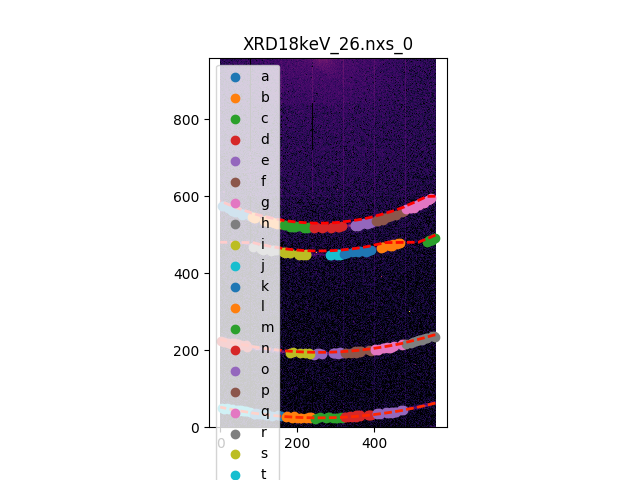

<IPython.core.display.Javascript object>


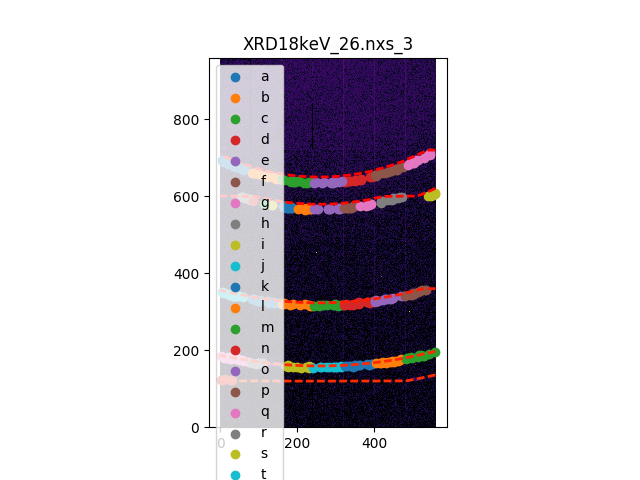

<IPython.core.display.Javascript object>


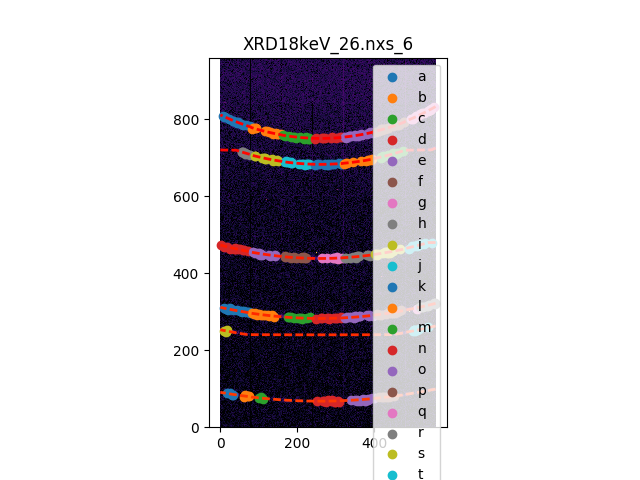

<IPython.core.display.Javascript object>


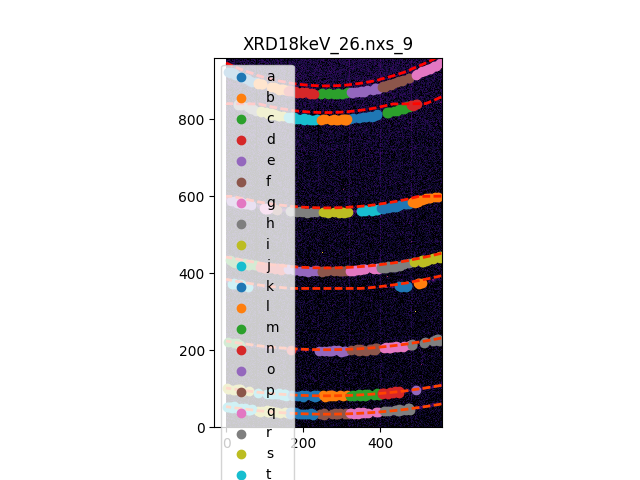

Cost function before refinement: 0.00173999910486
[  3.88099000e-01   1.30741300e-01   3.01077500e-02   1.74532925e-02
  -8.00000000e-03   1.74532925e-02   3.19310041e-01   7.19961198e-07]
     fun: 7.0564332400370299e-06
     jac: array([  1.10511353e-03,  -5.99924874e-08,   8.74732109e-08,
         2.05427733e-04,  -1.45328158e-08,   5.38889781e-03,
        -2.66973643e-08,  -1.64845915e-12,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 304
     nit: 30
    njev: 30
  status: 0
 success: True
       x: array([  3.78099000e-01,   8.20970586e-02,   3.69512025e-02,
         0.00000000e+00,   6.17103394e-03,   1.74532925e-02,
         4.63465667e-01,   7.18887422e-07])
Cost function after refinement: 7.05643324004e-06
GonioParam(dist=0.37809900000000002, poni1=0.082097058612222176, poni2=0.036951202543985213, rot1_scale=0.0, rot1_offset=0.0061710339370157196, rot2_scale=0.017453292519943295, rot2_offset=0.46346566717043491, rot3=7.1888742172412816e-07)
ma

<IPython.core.display.Javascript object>


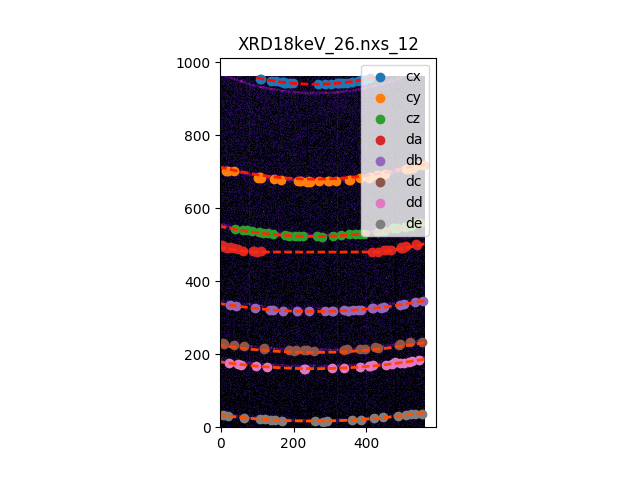

<IPython.core.display.Javascript object>


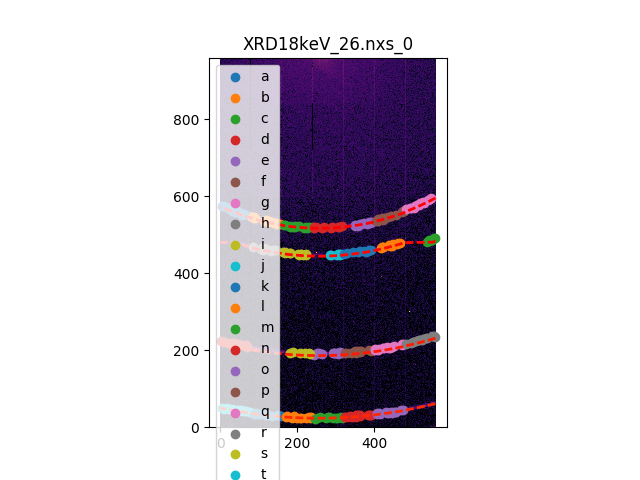

<IPython.core.display.Javascript object>


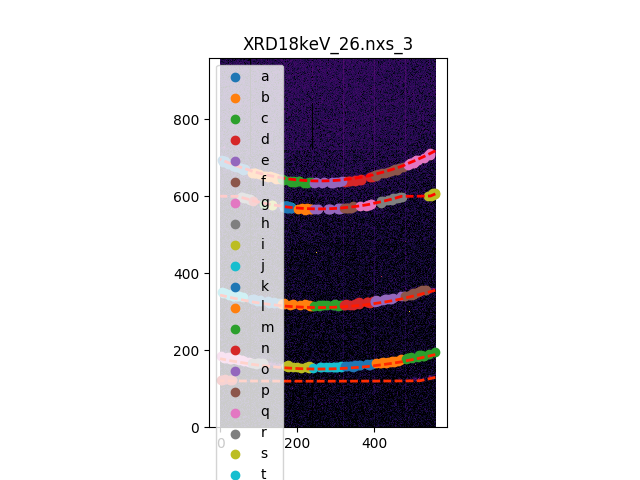

<IPython.core.display.Javascript object>


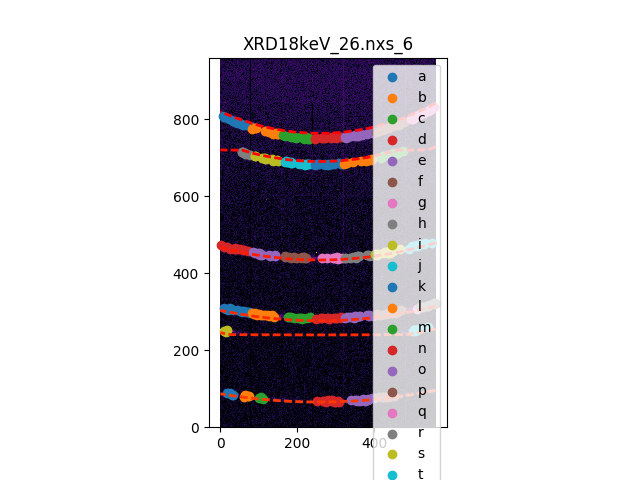

<IPython.core.display.Javascript object>


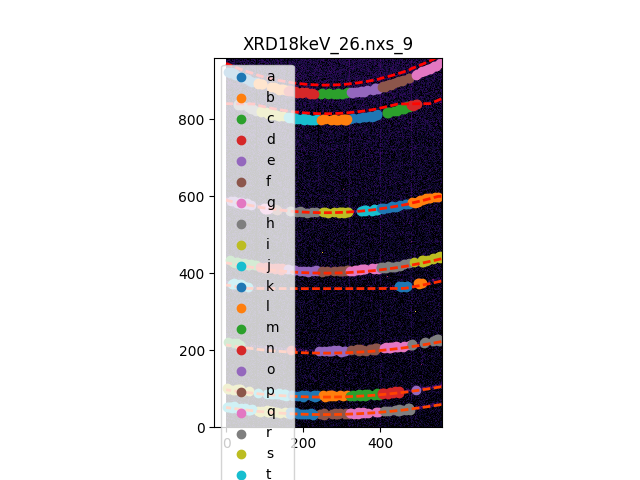

<IPython.core.display.Javascript object>


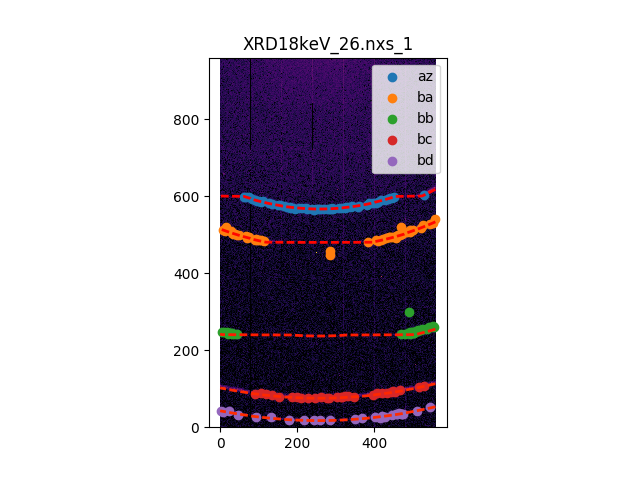

<IPython.core.display.Javascript object>


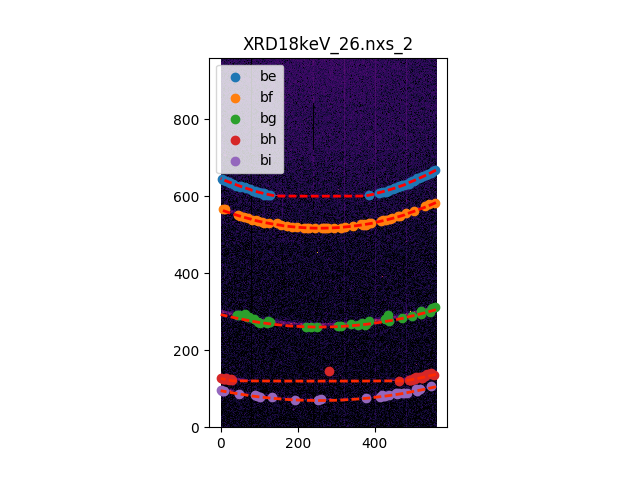

<IPython.core.display.Javascript object>


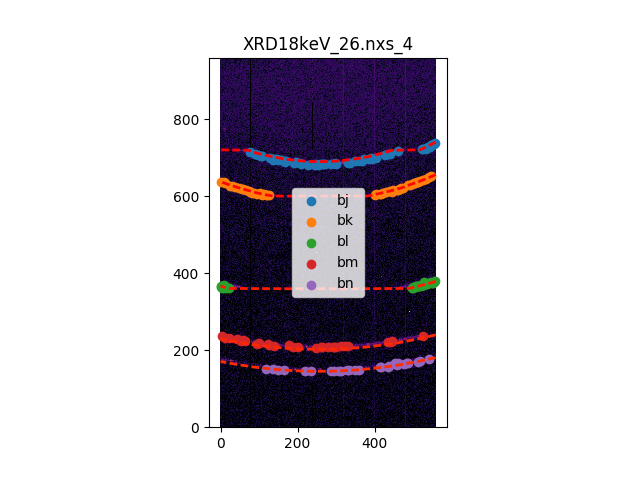

<IPython.core.display.Javascript object>


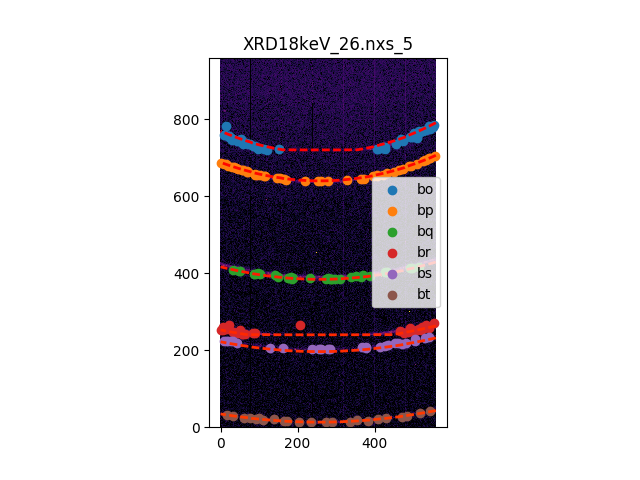

<IPython.core.display.Javascript object>


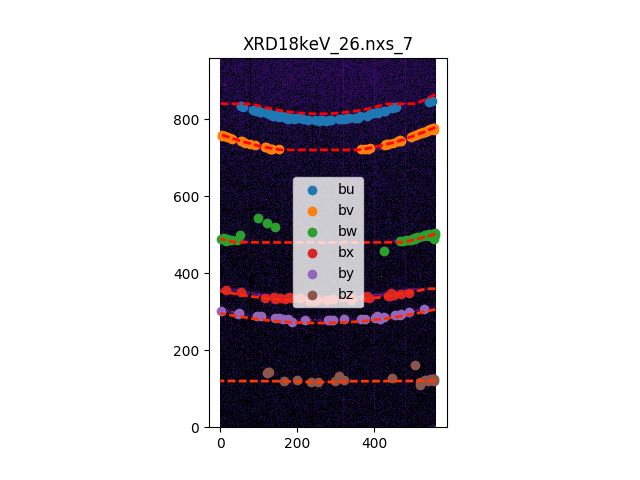

<IPython.core.display.Javascript object>


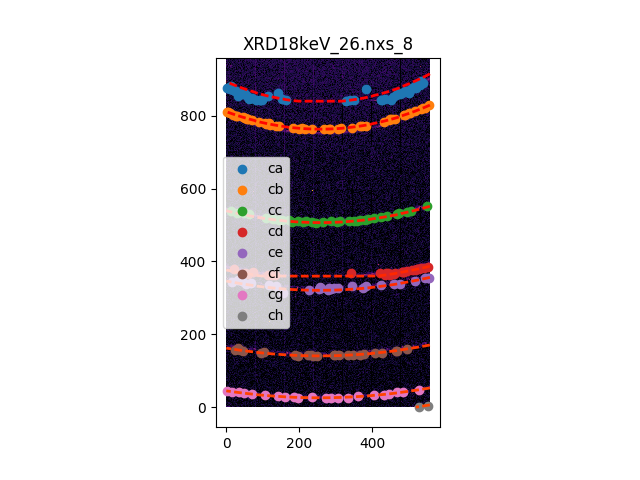

<IPython.core.display.Javascript object>


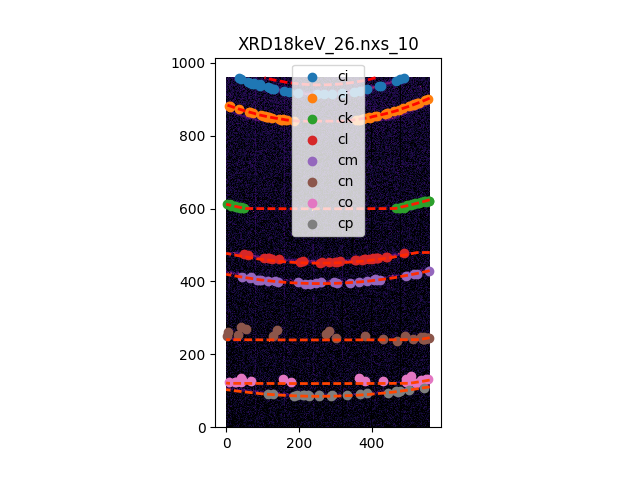

<IPython.core.display.Javascript object>


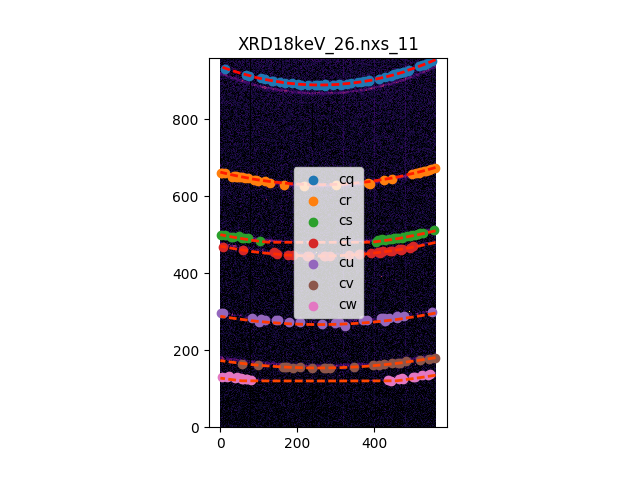

<IPython.core.display.Javascript object>


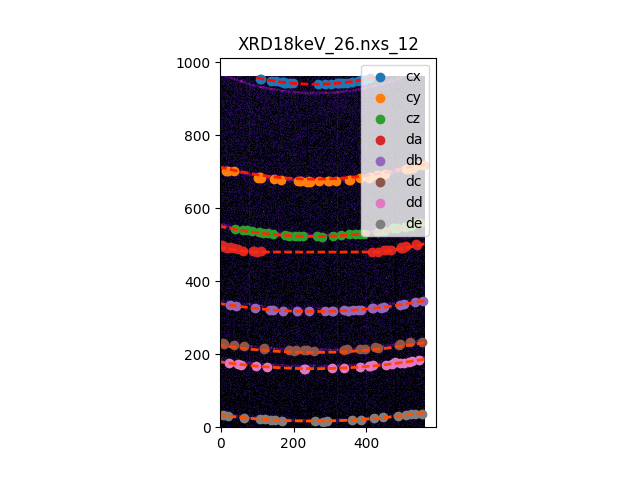

In [27]:
# execute the calibration

calibration(json, params)

<IPython.core.display.Javascript object>


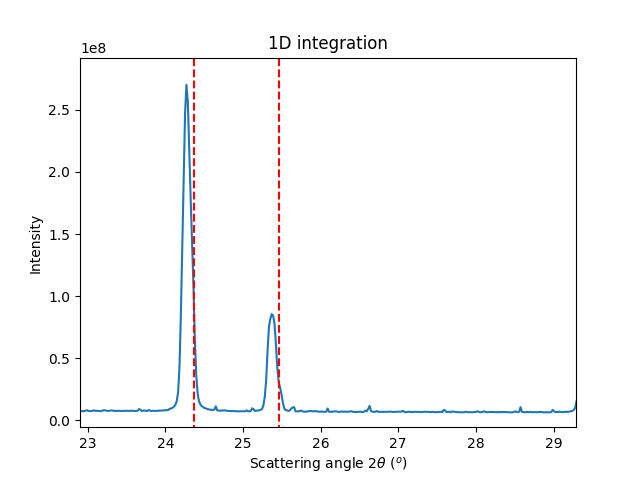

In [30]:
# plot the full diffractogram

def f(img: ndarray) -> ndarray:
    img = numpy.where(img > 3000, 0, img)
    return img

integrate(json, params, f, plot_calibrant=True)

## Integration <a name="integration"></a>

In [9]:
# integrate all the diffractogram

# let's take all the images
def to_use_sample(frame: CalibrationFrame) -> bool:
    return True

ceo2 = Calibration(os.path.join(PUBLISHED, "xrd-test", "calibration"),
                   os.path.join(ROOT, "2016-09-07", "IHR_30.nxs"),
                   DatasetPathWithAttribute("interpretation", b"image"),
                   DatasetPathContains("scan_data/actuator_1_1"),
                   [5, 32, 68],
                   to_use_sample,
                   Calibrant("CeO2"),
                   Detector("Xpad_flat"),
                   Wavelength(6.8877e-11),
                   functions
                   )

def f(img: ndarray) -> ndarray:
    img = numpy.where(img > 20000, 0, img)
    return img

integrate(json, ceo2, f)

OSError: Unable to open file (Unable to open file: name = '/nfs/ruche-diffabs/diffabs-soleil/com-diffabs/2016/run2/2016-09-07/ihr_30.nxs', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)